<a href="https://colab.research.google.com/github/anshkaggarwal22/VirtualPowerPlantProject/blob/main/Read_Demand_Generation_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Electricity Demand in India 2019-2022

In [ ]:
# libraries used to deal with dates in the plot
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
import os

In [ ]:
from google.colab import drive
WORK_DRIVE = '/content/drive'
drive.mount(WORK_DRIVE)

Mounted at /content/drive


In [ ]:
# Creating folder/file paths
WORK_AREA = WORK_DRIVE + '/MyDrive/Ansh Aggarwal/Models/Unit Commitment and Economic Dispatch'
os.chdir(WORK_AREA)

inputs_path = './inputs/'
outputs_path = './outputs/'
demand_filepath = inputs_path + 'daily_demand_usage_by_state_region_2019_2020.csv'

Power Generation Graph Code

In [ ]:
# Read CSV file and parse datetime in column Dates, using the format set
custom_date_parser = lambda x: dt.datetime.strptime(x, '%m/%d/%Y')

df_daily_demand = pd.read_csv(demand_filepath,
                parse_dates=['Date'],
                date_parser=custom_date_parser)

In [ ]:
df_daily_demand['Generation Added Up'] = pd.to_numeric(df_daily_demand['Generation Added Up'], errors='coerce')
df_daily_demand.info()
df_daily_demand.head()

In [ ]:
mask_r = df_daily_demand.Region.isin(['Northern', 'Eastern', 'Western', 'Southern', 'NorthEastern'])
df_r = df_daily_demand[mask_r].copy()

In [ ]:
# Configure size of plot
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
#Add title and axis labels
plt.title("India: Power Generation 2017-2020", size=18)
plt.xlabel('Date', size =14)
plt.ylabel('Power Generation [GW]', size =14)

generation_by_date_india = df_r.groupby('Date')['Generation Added Up'].sum()

# Format time axis, arbitrarily selecting 20 days as step for major ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))

# Plot Data
plt.plot(generation_by_date_india.index, generation_by_date_india.values, color="green")
#plt.plot(df_r['Date'], df_r['Generation Added Up'], color="green")
plt.gcf().autofmt_xdate() #GCF means "get the current figure"

# Save plot to Drive
plt.savefig(outputs_path + 'india_region_daily_power_generation.png')
plt.show()

Usage/Demand Graph Code

In [ ]:
# Read CSV file and parse datetime in column Dates, using the format set
custom_date_parser = lambda x: dt.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')

df_daily_demand = pd.read_csv(demand_filepath,
                 parse_dates=['Dates'],
                date_parser=custom_date_parser)

In [ ]:
df_daily_demand.info()
df_daily_demand.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   States     16599 non-null  object        
 1   Regions    16599 non-null  object        
 2   latitude   16599 non-null  float64       
 3   longitude  16599 non-null  float64       
 4   Dates      16599 non-null  datetime64[ns]
 5   Usage      16599 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 778.2+ KB


,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8
4,UP,NR,27.599981,78.050006,2019-01-02,313.9


In [ ]:
mask_r = df_daily_demand.Regions.isin(['NR','ER','SR','WR','NER'])
df_r = df_daily_demand[mask_r].copy()

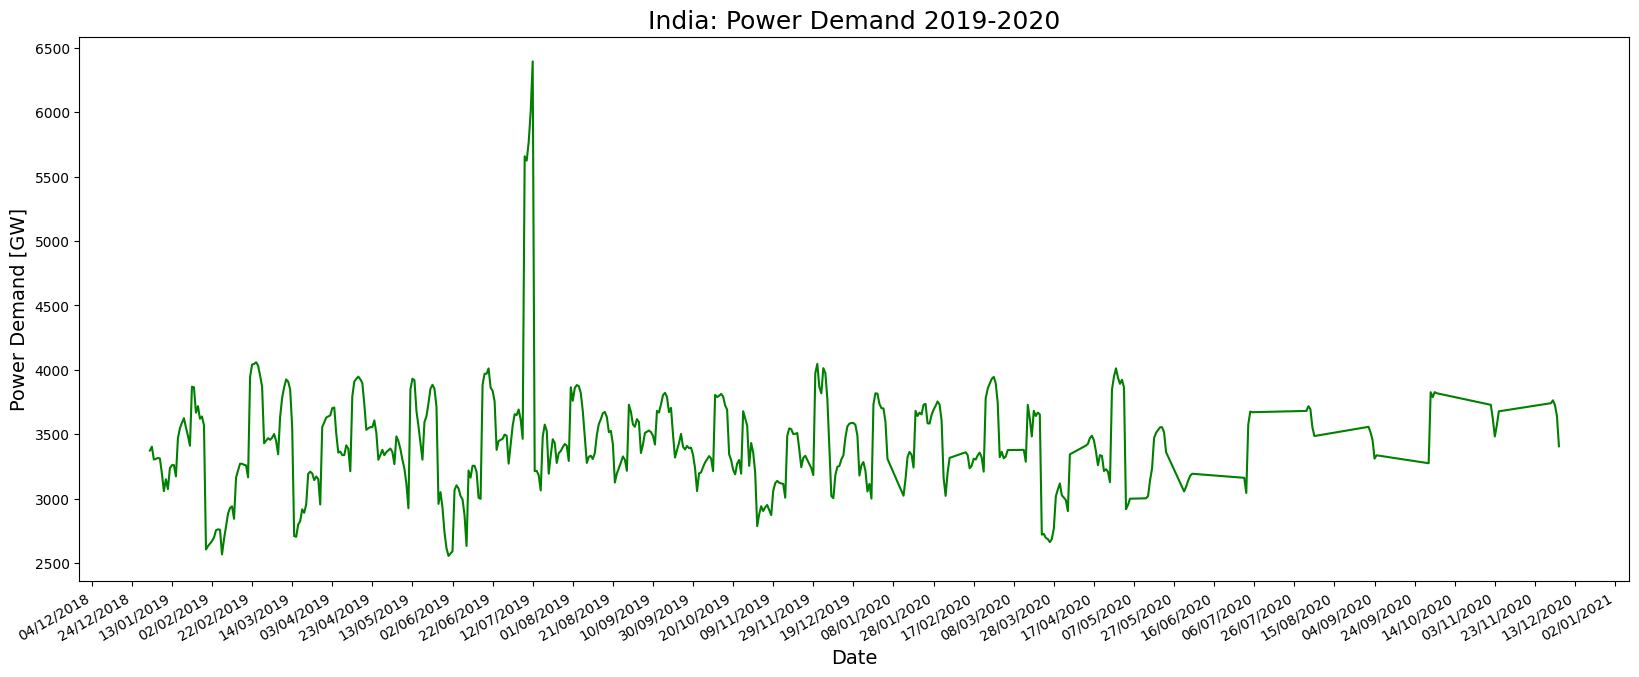

In [ ]:
# Configure size of plot
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
# Add title and axis labels
plt.title("India: Power Demand 2019-2020", size=18)
plt.xlabel('Date', size =14)
plt.ylabel('Power Demand [GW]', size =14)

usage_demand_by_region = df_r.groupby('Dates')['Usage'].sum()

# Format time axis, arbitrarily selecting 20 days as step for major ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))

# Plot Data
plt.plot(usage_demand_by_region.index, usage_demand_by_region.values, color="green")
#plt.plot(df_r['Dates'], df_r['Generation Added Up'], color="green")
plt.gcf().autofmt_xdate() #GCF means "get the current figure"

# Save plot to Drive
plt.savefig(outputs_path + 'india_region_daily_demand.png')
plt.show()